<a href="https://colab.research.google.com/github/FunmiSomoye/School-Projects/blob/master/Hypothesis_and_ANOVAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment

### Funmi Somoye

## About the data

Researchers conducted a random trial on the treatment of fibromyalgia. Fibromyalgia is a condition where the body suffers from chronic, localized pain and as a result affects a sufferer's psyche among many other symptoms. There is no cure for fibromyalgia except to manage the pain. We obtained a dataset that has 50 observations and 11 variables. The variables are sex, BMI, duration of treatement, age, treatment, coexists i.e. other health issues, FIQ_baseline, FIQ_12W, and FIQ_24W scores. 

Treatment is measured using the severity of the symptoms immediately before the treatment was started (FIQ-baseline) and after 12 weeks of treatment (FIQ-12W) and 24 weeks of treatment (FIQ-24W). Let us look to see if the tai chi treatment relieves pain after 12 weeks. That is, we want to determine if there is a difference in pain severity given the tai chi treatment. 

### Question 1

Using the taiChiData.csv dataset, study the effect of treatment after 24 weeks. 


In [ ]:
import matplotlib.pyplot as plt
from numpy import arange
import scipy.stats as scs
import pandas as pd
import seaborn as sns
import random as rnd
import numpy as np
from matplotlib.legend import Legend

In [ ]:
%matplotlib inline

In [ ]:
data = pd.read_csv('taiChiData.csv', sep=',')

In [ ]:
data.head()

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0


In [ ]:
#see column and row size of dataset
data.shape

(50, 11)

#### Question 1.1
Plot a box-and-whisker plot to see the mean difference between 24 weeks and the baseline. Formulate a hypothesis about treatment after 24 weeks. Interpret the results obtained.


# your answer

In [ ]:
data.isnull().any() #Check for any missing value

Unnamed: 0      False
Id              False
sex             False
BMI             False
duration        False
age             False
treatment       False
coexists         True
FIQ_baseline     True
FIQ_12W          True
FIQ_24W          True
dtype: bool

In [ ]:
data.isnull().sum(axis=0) #Sum missing values in columns

Unnamed: 0      0
Id              0
sex             0
BMI             0
duration        0
age             0
treatment       0
coexists        3
FIQ_baseline    4
FIQ_12W         3
FIQ_24W         1
dtype: int64

In [ ]:
#Since it is a clinical trial dataset, drop all the missing values in the dataset
data.dropna(inplace=True)

In [ ]:
#confirm that missing values have been removed
data.isnull().sum(axis=0) 

Unnamed: 0      0
Id              0
sex             0
BMI             0
duration        0
age             0
treatment       0
coexists        0
FIQ_baseline    0
FIQ_12W         0
FIQ_24W         0
dtype: int64

In [ ]:
#see size of new dataset
data.shape

(39, 11)

In [ ]:
#see summary statistics of the data
data.describe()

,Unnamed: 0,Id,sex,BMI,duration,age,FIQ_baseline,FIQ_12W,FIQ_24W
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,24.641026,25.615385,0.769231,33.871795,12.841026,49.797692,66.128205,59.256410,59.487179
std,14.243165,14.805076,0.426833,6.299204,4.284778,7.630660,11.927808,12.552454,12.744187
min,1.000000,1.000000,0.000000,20.300000,-1.800000,34.660000,42.000000,32.000000,38.000000
25%,14.000000,13.000000,1.000000,30.200000,10.850000,44.295000,58.500000,51.000000,49.500000
50%,24.000000,25.000000,1.000000,34.000000,13.300000,49.990000,66.000000,59.000000,58.000000
75%,35.500000,38.000000,1.000000,38.150000,16.300000,56.020000,78.000000,68.500000,69.500000
max,50.000000,50.000000,1.000000,45.900000,19.800000,62.730000,85.000000,88.000000,85.000000


General Distribution

Text(0.5, 1.0, 'General Pain Severity Distribution Before Treatment vs After 24Weeks Treatment')

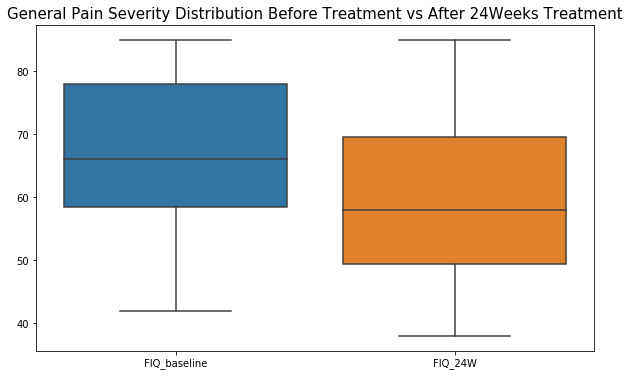

In [ ]:
#box plot of taichi treatment at the beginning and after 24 weeks
fig = plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['FIQ_baseline','FIQ_24W']] , orient='v', showfliers=True) 
plt.title('General Pain Severity Distribution Before Treatment vs After 24Weeks Treatment', size = 15)

There are no outliers for the performance after 24weeks of treatment. This data can be trusted for integrity.

The median for the 24weeks distribution is less than that of Before treatment.
Although the boxplots overlap (showing similarity of data) even up to the whiskers at the top, majority of the data points after 24 weeks of Control treatment are at a general minimum value than for Before treatment.
The lower whiskers for the data after 24Weeks treatment, is lower than for before treatment. 
This is also shown by the medians. The distribution of Pain severity data after 24weeks of treatment median is lower than for Before treatment. 

So although from the top, it does look like some patients experienced no reduction, the box, the median, as well as the lower whiskers, shows a general decrease in pain severity after 24 weeks of treatment.

In [ ]:
#compute mean difference of both data
print(abs(data['FIQ_baseline'].mean() - data['FIQ_24W'].mean()))

6.641025641025635


On average, there is a difference in the pain severity before and after treatment of any type, of 6.641. 
This confirms the observation from the boxplots comparison that there is generally a decrease in pain severity after 24weeks of treatment.

#### Analyse data by treatment. 
##### Thus, split data by treatment.

In [ ]:
control = data[data.treatment== 'control'] #control treatment data
taiChi = data[data.treatment == 'tai chi'] #taichi treatment data

In [ ]:
taiChi.shape

(13, 11)

In [ ]:
taiChi.head()

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0
8,9,32,1,38.8,14.5,36.95,tai chi,none,61.0,48.0,49.0
14,15,34,0,20.8,3.3,43.69,tai chi,none,68.0,65.0,58.0
24,25,24,1,37.3,14.6,48.87,tai chi,diabetes,85.0,69.0,74.0
25,26,14,0,22.5,16.6,56.16,tai chi,hypertension,67.0,65.0,57.0


In [ ]:
control.shape

(26, 11)

In [ ]:
control.head()

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0
7,8,19,1,28.1,11.7,51.72,control,none,60.0,54.0,54.0


Start analysis with TaiChi treatment

### TaiChi

See the mean difference between 24 weeks and the baseline

Text(0.5, 1.0, 'Pain Severity Distribution Before Treatment and  after 24 Weeks TaiChi Treatment')

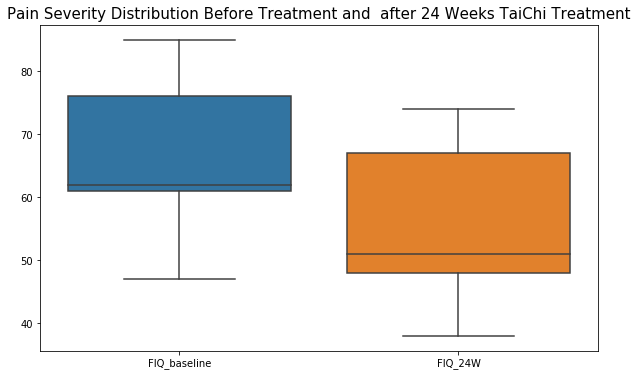

In [ ]:
#box plot of taichi treatment at the beginning and after 24 weeks
fig = plt.figure(figsize=(10, 6))
sns.boxplot(data=taiChi[['FIQ_baseline','FIQ_24W']] , orient='v', showfliers=True) 
plt.title('Pain Severity Distribution Before Treatment and  after 24 Weeks TaiChi Treatment', size = 15)

The median of the distribution for after 24weeks of TaiChi treatment is much less than that of Before treatment.
Although the boxplots overlap (showing similarity of data), the entire range of the Pain Severity data after 24weeks of treatment is not up to the maximum value of the distribution Before treatment.
Also, the distribution of the 24weeks data falls below the whiskers from the data plot Before treatment, thus having much lower minimum values than Before treatment.

Thus,
The box plots show the decrease in pain severity after 24 weeks of TaiChi treatment.

In [ ]:
#compute mean difference of both data
print(abs(taiChi['FIQ_baseline'].mean() - taiChi['FIQ_24W'].mean()))

11.15384615384616


On average, there is a difference in the pain severity before and after treatment, of 11.153. This confirms the observation from the boxplots comparison that there is generally a good decrease in pain severity after 24weeks of TaiChi treatment.

### Control

See the mean difference between 24 weeks and the baseline

Text(0.5, 1.0, 'Pain Severity Distribution Before Treatment and after 24 Weeksvs Control Treatment')

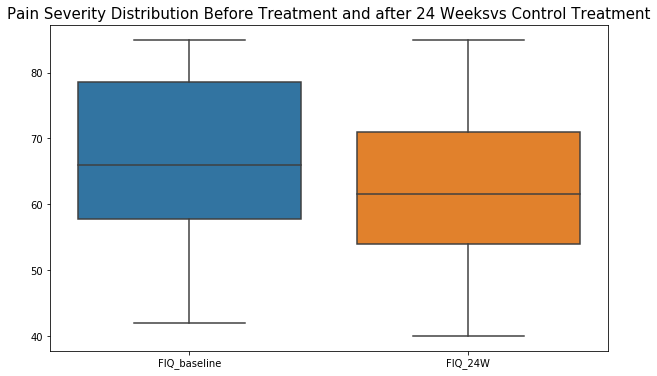

In [ ]:
#box plot of taichi treatment at the beginning and after 24 weeks
fig = plt.figure(figsize=(10, 6))
sns.boxplot(data=control[['FIQ_baseline','FIQ_24W']] , orient='v', showfliers=True) 
plt.title('Pain Severity Distribution Before Treatment and after 24 Weeksvs Control Treatment', size = 15)

The median for the 24weeks distribution is less than that of Before treatment.
Although the boxplots overlap (showing similarity of data) even up to the whiskers, majority of the data points after 24 weeks of Control treatment are at a minimum value than for BEfore treatment.
This is also shown by the medians. The distribution of Pain severity data after 24weeks of Control treatment median is lower than for Before treatment. 

Thus,
The box plots show a decrease in pain severity after 24 weeks of controlled treatment.

In [ ]:
#compute mean difference of both data
print(abs(control['FIQ_baseline'].mean() - control['FIQ_24W'].mean()))

4.38461538461538


On average, there is a difference in the pain severity before and after treatment, of 4.384. This confirms the observation from the boxplots comparison that there is generally a decrease in pain severity after 24weeks of controlled treatment.

### Conduct Hypothesis testing about treatment after 24 weeks

####  First Hypothesis

$H_0: \mu = \overline{x}$, i.e., TaiChi and Control treatment averagely has the same effects after 24 weeks of treatment

$H_1: \mu \neq \overline{x}$, i.e., The effectiveness of TaiChi and Control treatment is different, after 24 weeks of treatment

Text(0.5, 1.0, 'Pain Severity Before Treatment vs Treatment after 24 Weeks; Baseline and TaiChi')

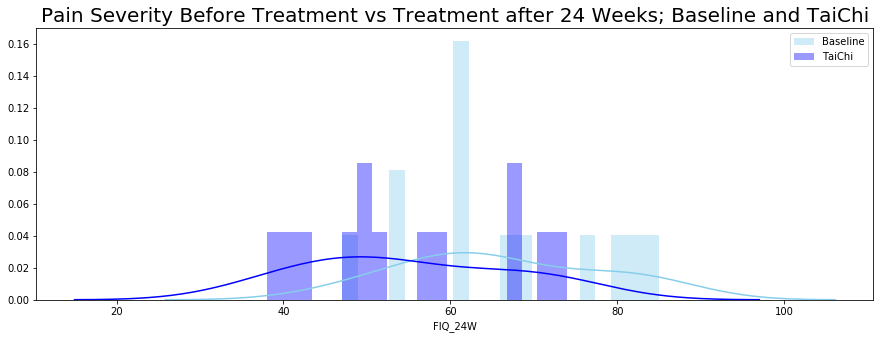

In [ ]:
#Compare distribution of Baseline,and TaiChi data after 24weeks
fig = plt.figure(figsize=(15, 5))#set figure size

#use distplot to view distributions
sns.distplot(taiChi['FIQ_baseline'] ,  bins=20, color='skyblue', label='Baseline') #baseline data
sns.distplot(taiChi['FIQ_24W'] ,  bins=20, color='blue',  label='TaiChi') #control data

plt.legend()#show legend

plt.title('Pain Severity Before Treatment vs Treatment after 24 Weeks; Baseline and TaiChi', size = 20) 

The graphs above show the distribution of pain severity in patients using TaiChi treatment. 
It is clear that the general minimum and maximum pain severity was reduced after 24 weeks of TaiChi treatment.

Text(0.5, 1.0, 'Pain Severity Before Treatment vs Treatment after 24 Weeks; Baseline and Control')

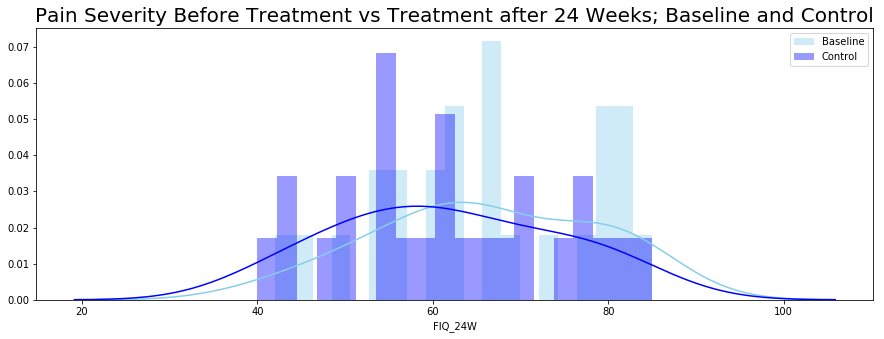

In [ ]:
#Compare distribution of Baseline, and Control data after 24weeks
fig = plt.figure(figsize=(15, 5))#set figure size

#use distplot to view distributions
sns.distplot(control['FIQ_baseline'],  bins=20, color='skyblue', label='Baseline') #baseline data
sns.distplot(control['FIQ_24W'],  bins=20, color='blue',  label='Control') #control data

plt.legend()#show legend

plt.title('Pain Severity Before Treatment vs Treatment after 24 Weeks; Baseline and Control', size = 20) 

The graphs above show the distribution of pain severity in patients using controlled treatment. 
The distributions have siimilar range.
The distributions overlap at the max and mins, both having the highest peaks between 55 to 65.
Nevertheless, it is clear that there is a general reduction in severity after 24 weeks of treatment as the frequencies of the highest values are greatly decreased.

Since the data are for two separate unrelated groups, use Independent t-test

In [ ]:
scs.ttest_ind (taiChi['FIQ_24W'], control['FIQ_24W'])

Ttest_indResult(statistic=-1.5854805789331443, pvalue=0.12136799319372792)

A p value of approximately 0.12 which is higher than the significance level of 0.05. thus, the null hypothesis is accepted. This means that the average pain score after 24 weeks with TaiChi treatment is similar to the average pain score using control treatment. 


####  Second Hypothesis

$H_0: \mu = \overline{x}$, i.e., other existing sickness has no consequence on effectiveness of TaiChi

$H_1: \mu \neq \overline{x}$, i.e., other existing sickness has a consequence on effectiveness of TaiChi

Text(0.5, 1.0, 'Distribution of Pain Severity of Patients')

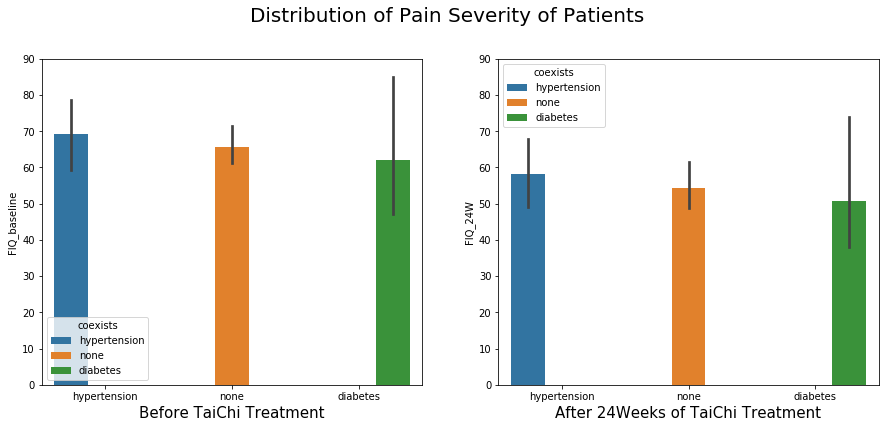

In [ ]:
#TaiChi data

fig = plt.figure(figsize=(15, 6)) # figure for subplots

ax1 = plt.subplot(1,2,1)  # 1 by 2 grid, first grid
ax2 = plt.subplot(1,2,2) # 1 by 2 grid, second grid

#Plot TaiChi baseline data
sns.barplot(x='coexists',y='FIQ_baseline', hue='coexists', data=taiChi, ax=ax1)
ax1.set_xlabel('Before TaiChi Treatment', size = 15)

#Plot TaiChi 24W data
sns.barplot(x='coexists',y='FIQ_24W', hue='coexists', data=taiChi, ax=ax2)
ax2.set_xlabel('After 24Weeks of TaiChi Treatment', size = 15)

ax1.set_ylim([0, 90])
ax2.set_ylim([0, 90])

#Set title for two plots
plt.suptitle('Distribution of Pain Severity of Patients', size = 20, y=1.0)

In [ ]:
#group taichi data based on other exisiting sickness
hp = taiChi[taiChi['coexists']=='hypertension']
db = taiChi[taiChi['coexists']=='diabetes']
none = taiChi[taiChi['coexists']=='none']

Since data are for more than two independent groups within a related data, use One-Way Anova

In [ ]:
scs.f_oneway(hp['FIQ_24W'], db['FIQ_24W'], none['FIQ_24W'])

F_onewayResult(statistic=0.33117932148626816, pvalue=0.7256606398386861)

A p value of approximately 0.72 which is higher than the significance level of 0.05. Thus, the null hypothesis is accepted.
This means that the there is indeed, no consequence of existing sicknes on the effectiveness of TaiChi treatment

#### Question 1.2
Visualize the data for baseline treatment and treatment after 24 weeks.


In [ ]:
# your answers

##### Relationship

Text(0.5, 1.0, 'Distribution of Pain Severity of Patients')

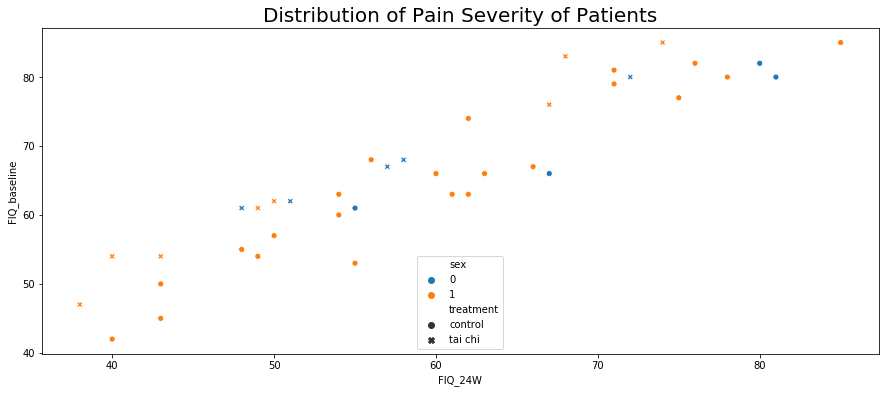

In [ ]:
#see relationship with treatment before and after 24weeks

fig = plt.figure(figsize=(15, 6)) # figure for subplots


#See relationship using using scatter
sns.scatterplot(x='FIQ_24W',y='FIQ_baseline', style='treatment', hue='sex', data=data)
plt.legend(loc='lower center')


#Set title for plot
plt.title('Distribution of Pain Severity of Patients', size = 20, y=1.0)

This plot shows that there is a positive linear relationship between Pain severity before treatment, and after treatment, for both Control and TaiChi treatments.
On this plot, it is easier to see the pain score changes for individual patients before and after treatments. 
Also, both sexes experienced high thresholds of pain, but no 0s experienced a low threshold of less than 45.

Again, this plot shows that the TaiChi patients experienced more reduction than their counterparts who used the control treatment as for the same level of pain before treatment, you can observe a greater reduction with the TaiChi treatment.

### Distribution

#### TaiChi

Text(0.5, 1.0, 'Distribution of Pain Severity of Patients')

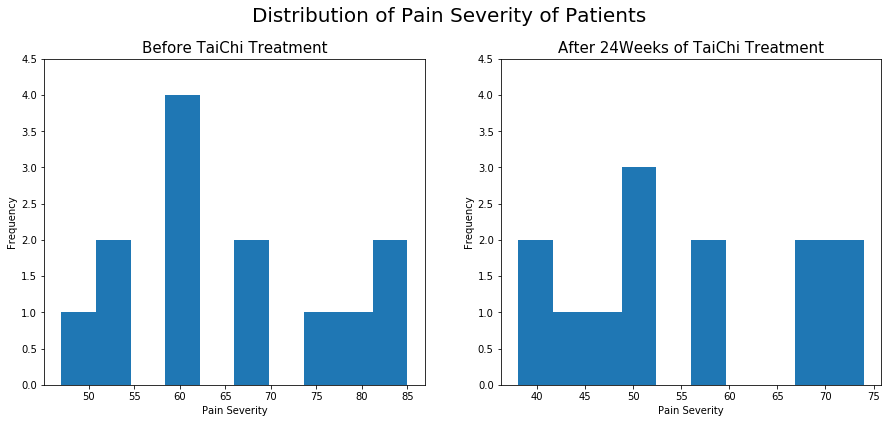

In [ ]:
#TaiChi data

fig = plt.figure(figsize=(15, 6)) # figure for subplots
#plt.title('Distribution of Pain Severity of Patients', size = 20, y=2.30, x=0.005)

ax1 = plt.subplot(1,2,1)  # 1 by 2 grid, first grid
ax2 = plt.subplot(1,2,2) # 1 by 2 grid, second grid

#Plot before treatment
taiChi['FIQ_baseline'].plot(kind='hist', ax=ax1)
ax1.set_xlabel('Pain Severity', size = 10)
ax1.set_title('Before TaiChi Treatment', size = 15)#set plot title

#Plot after treatment
taiChi['FIQ_24W'].plot(kind='hist', ax=ax2)
ax2.set_xlabel('Pain Severity', size = 10)
ax2.set_title('After 24Weeks of TaiChi Treatment', size = 15)

#set yaxis limits
ax1.set_ylim([0, 4.5])
ax2.set_ylim([0, 4.5])

#Set general title for the two plots
plt.suptitle('Distribution of Pain Severity of Patients', size = 20, y=1.0)

The graphs above show the distribution of pain severity in patients using TaiChi treatment. 
It is clear that the general minimum and maximum pain severity was reduced after 24 weeks of taichi treatment.

Also, there are totally less people experiencing high pain thresholds after 24weeks of TaiChi treatment, and there are no patients experiencing a pain severity from 75 - 84 anymore

#### Controlled

Text(0.5, 1.0, 'Distribution of Pain Severity of Patients')

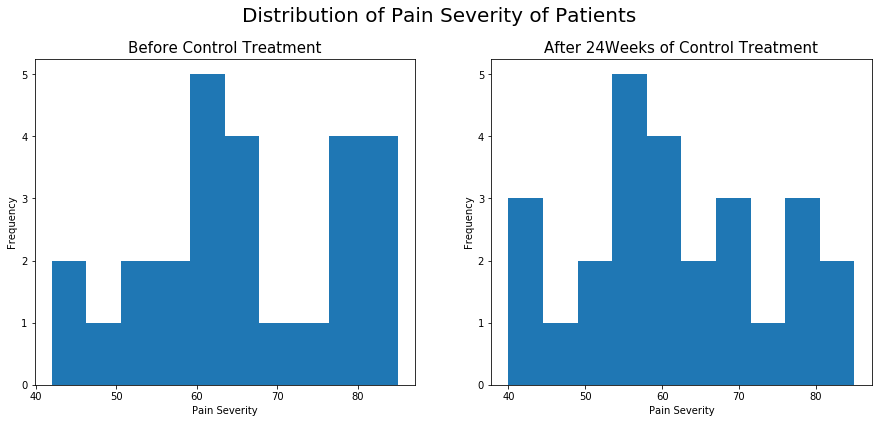

In [ ]:
#Control data

fig = plt.figure(figsize=(15, 6)) # figure for subplots

ax1 = plt.subplot(1,2,1)  # 1 by 2 grid, first grid
ax2 = plt.subplot(1,2,2) # 1 by 2 grid, second grid

#before treatment
control['FIQ_baseline'].plot(kind='hist', ax=ax1)
ax1.set_xlabel('Pain Severity', size = 10)
ax1.set_title('Before Control Treatment', size = 15)#set plot title

#after treatment, 24W
control['FIQ_24W'].plot(kind='hist', ax=ax2)
ax2.set_xlabel('Pain Severity', size = 10)
ax2.set_title('After 24Weeks of Control Treatment', size = 15)#set plot title

#Set general title for the two plots
plt.suptitle('Distribution of Pain Severity of Patients', size = 20, y=1.0)

The graphs above show the distribution of pain severity in patients using controlled treatment. 
The distributions have similar range.
Nevertheless, it is clear that there is a general reduction in severity after 24 weeks of treatment as the frequencies of the highest values are greatly decreased.

### See Patients 

##### See distribution of individual patients by gender, existing, sickness, and by treatment used

#### TaiChi

#### See general Pain severity levels of patients who used TaiChi treatment

Text(0.5, 1.0, 'Distribution and Pain Severity Level of Patients')

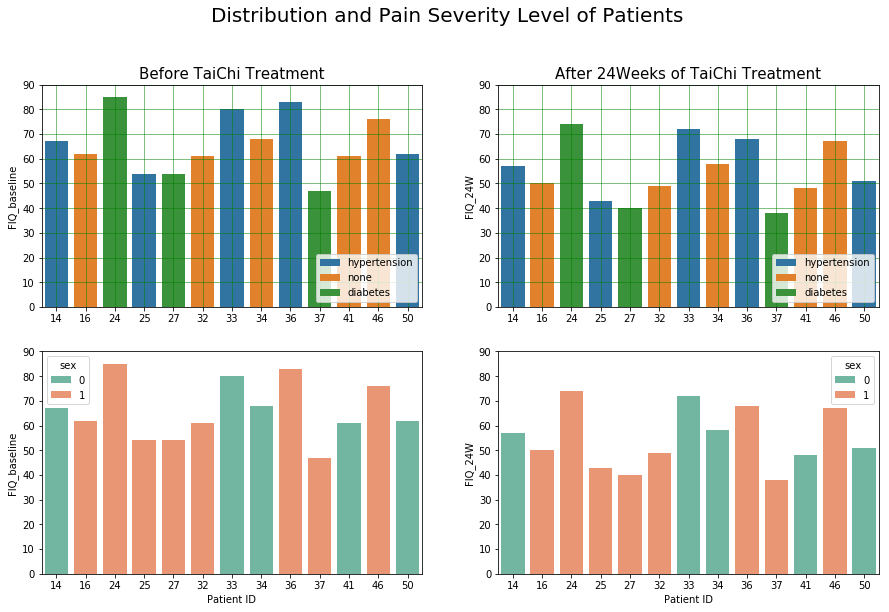

In [ ]:
fig = plt.figure(figsize=(15, 9)) # figure for subplots
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.)#add space between subplots

ax1 = plt.subplot(2,2,1)  # 1 by 2 grid, first grid
ax2 = plt.subplot(2,2,2) # 1 by 2 grid, second grid
ax3 = plt.subplot(2,2,3) # 1 by 2 grid, second grid
ax4 = plt.subplot(2,2,4) # 1 by 2 grid, second grid

#First plot. Before taichi treatment 
sns.barplot(x='Id', y='FIQ_baseline', hue='coexists', dodge=False, data=taiChi, ax=ax1)#set dodge false so bars widths remain same despite hue
ax1.set_xlabel(None)#set xaxis label 
ax1.set_title('Before TaiChi Treatment', size = 15)#set plot title
ax1.set_ylim([0, 90])#set y axis limit for proper comparisons
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='green')#show grid. for easy assessing and comparisons
ax1.legend(loc='lower right')#set legend position on graph


#Second plot. After 24w taichi treatment
sns.barplot(x='Id', y='FIQ_24W', hue='coexists', dodge=False, data=taiChi, ax=ax2)#set dodge false so bars widths remain same despite hue
ax2.set_xlabel(None)#set xaxis label
ax2.set_title('After 24Weeks of TaiChi Treatment', size = 15)#set plot title
ax2.set_ylim([0, 90])#set y axis limit for proper comparisons
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='green')#show grid. for easy assessing and comparisons
ax2.legend(loc='lower right')#set legend position on graph


#Third plot. Before taichi treatment 
sns.barplot(x='Id', y='FIQ_baseline', hue='sex', palette='Set2', dodge=False, data=taiChi, ax=ax3)#set dodge false so bars widths remain same despite hue
ax3.set_xlabel('Patient ID')#set xaxis label 
#ax3.set_title('Before TaiChi Treatment', size = 15)#set plot title
ax3.set_ylim([0, 90])#set y axis limit for proper comparisons

#Fourth plot. After 24w taichi treatment
sns.barplot(x='Id', y='FIQ_24W', hue='sex', palette='Set2', dodge=False, data=taiChi, ax=ax4)#set dodge false so bars widths remain same despite hue
ax4.set_xlabel('Patient ID')#set xaxis label
#ax2.set_title('After 24Weeks of TaiChi Treatment', size = 15)#set plot title
ax4.set_ylim([0, 90])#set y axis limit for proper comparisons

#Set general title for two plots
plt.suptitle('Distribution and Pain Severity Level of Patients', size = 20, y=1.0)

Assessing the graphs above, it is clear that good pain severity reduction was seen in every patient who used the taichi treatment.
It is clear that there are more 1s than 0s amongst the patients who received the taichi treatment. The sex of the patient does not seem to have hadd any effect on treatment performance.

#### Controlled

#### See general Pain severity levels of patients who used control treatment

Text(0.5, 1.0, 'Distribution and Pain Severity Level of Patients')

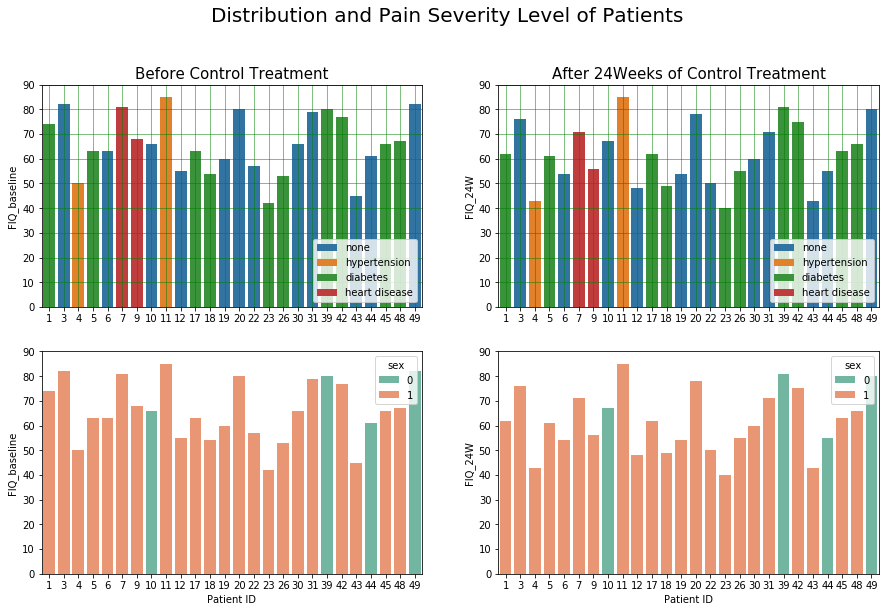

In [ ]:
fig = plt.figure(figsize=(15, 9)) # figure for subplots
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.)#add space between subplots


ax1 = plt.subplot(2,2,1)  # 1 by 2 grid, first grid
ax2 = plt.subplot(2,2,2) # 1 by 2 grid, second grid
ax3 = plt.subplot(2,2,3) # 1 by 2 grid, second grid
ax4 = plt.subplot(2,2,4) # 1 by 2 grid, second grid


#First plot. Before taichi treatment 
sns.barplot(x='Id', y='FIQ_baseline', hue='coexists', dodge=False, data=control, ax=ax1)#set dodge false so bars widths remain same despite hue
ax1.set_xlabel(None)#set xaxis label 
ax1.set_title('Before Control Treatment', size = 15)#set plot title
ax1.set_ylim([0, 90])#set y axis limit for proper comparisons
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='green')#show grid. for easy assessing and comparisons
ax1.legend(loc='lower right')#set legend position on graph

#Second plot. After 24w taichi treatment
sns.barplot(x='Id', y='FIQ_24W', hue='coexists', dodge=False, data=control, ax=ax2)#set dodge false so bars widths remain same despite hue
ax2.set_xlabel(None)#set xaxis label
ax2.set_title('After 24Weeks of Control Treatment', size = 15)#set plot title
ax2.set_ylim([0, 90])#set y axis limit for proper comparisons
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='green')#show grid. for easy assessing and comparisons
ax2.legend(loc='lower right')#set legend position on graph

#Third plot. Before taichi treatment 
sns.barplot(x='Id', y='FIQ_baseline', hue='sex', palette='Set2', dodge=False, data=control, ax=ax3)#set dodge false so bars widths remain same despite hue
ax3.set_xlabel('Patient ID')#set xaxis label 
#ax3.set_title('Before TaiChi Treatment', size = 15)#set plot title
ax3.set_ylim([0, 90])#set y axis limit for proper comparisons

#Fourth plot. After 24w taichi treatment
sns.barplot(x='Id', y='FIQ_24W', hue='sex', palette='Set2', dodge=False, data=control, ax=ax4)#set dodge false so bars widths remain same despite hue
ax4.set_xlabel('Patient ID')#set xaxis label
#ax2.set_title('After 24Weeks of TaiChi Treatment', size = 15)#set plot title
ax4.set_ylim([0, 90])#set y axis limit for proper comparisons

#Set general title for two plots
plt.suptitle('Distribution and Pain Severity Level of Patients', size = 20, y=1.0)

Assessing the graphs above, it is clear that with control treatment, many patients experienced very little to no reduction in pain severity.
It is clear that there are more 1s than 0s amongst the patients who received the taichi treatment. The sex of the patient does not seem to have hadd any effect on treatment performance.

#### See average Pain Severity Reduction for Patients

Text(0.5, 1.0, 'Distribution of Pain Severity of Patients')

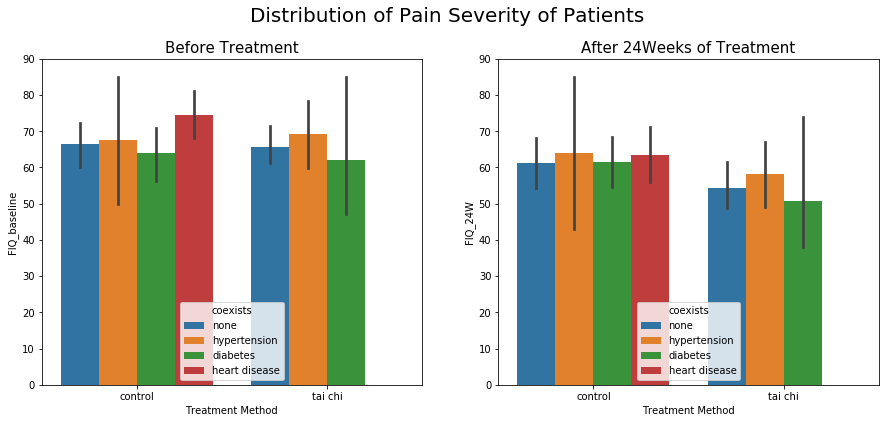

In [ ]:
fig = plt.figure(figsize=(15, 6)) # figure for subplots

ax1 = plt.subplot(1,2,1)  # 1 by 2 grid, first grid
ax2 = plt.subplot(1,2,2) # 1 by 2 grid, second grid

#Plot TaiChi baseline data
sns.barplot(x='treatment',y='FIQ_baseline', hue='coexists', data=data, ax=ax1) #boxplot
ax1.set_title('Before Treatment', size = 15)
ax1.set_xlabel('Treatment Method', size = 10)#set x-axis label

#Plot TaiChi 24W data
sns.barplot(x='treatment',y='FIQ_24W', hue='coexists', data=data, ax=ax2) #boxplot
ax2.set_title('After 24Weeks of Treatment', size = 15)
ax2.set_xlabel('Treatment Method', size = 10)#set x-axis label

#set y-axis limits
ax1.set_ylim([0, 90])
ax2.set_ylim([0, 90])

#Set general title for two plots
plt.suptitle('Distribution of Pain Severity of Patients', size = 20, y=1.0)

The plots above clearly shows that there were no patients with heart disease on the TaiChi treatment.
The TaiChi treatment also shows an average great level of pain reduction for all patients, irrespective of existing sickness
Whereas, the Control treatment an average minimal Pain Severity reduction than for the TaiChi treatment, across all patients.

#### Compare control and taichi treatment together, on per patient basis

Text(0.5, 1.0, 'Distribution of Patients by Treatment; Existing Sickness')

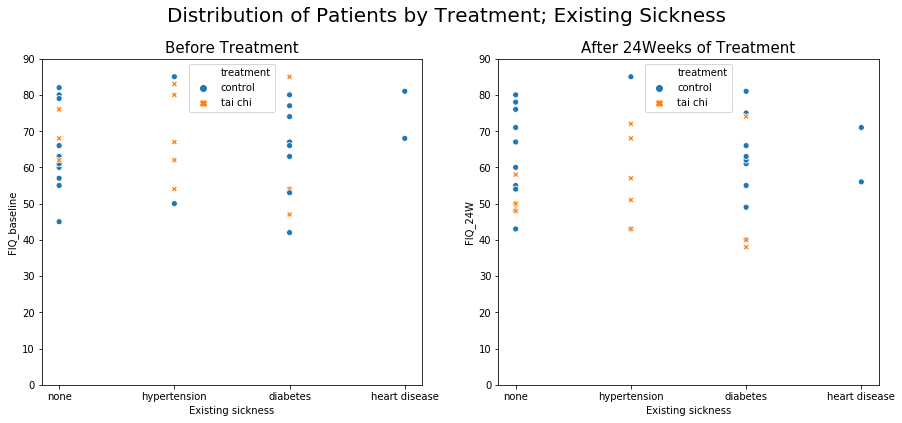

In [ ]:
fig = plt.figure(figsize=(15, 6)) # figure for subplots

ax1 = plt.subplot(1,2,1)  # 1 by 2 grid, first grid
ax2 = plt.subplot(1,2,2) # 1 by 2 grid, second grid

#Plot TaiChi baseline data
sns.scatterplot(x='coexists',y='FIQ_baseline', hue='treatment', style='treatment', data=data, ax=ax1) #scatterplot
ax1.set_title('Before Treatment', size = 15)#set individual graph title
ax1.legend(loc='upper center')#send legend position on graph
ax1.set_xlabel('Existing sickness', size = 10)#set x-axis label

#Plot TaiChi 24W data
sns.scatterplot(x='coexists',y='FIQ_24W', hue='treatment', style='treatment', data=data, ax=ax2) #scatterplot
ax2.set_title('After 24Weeks of Treatment', size = 15)#set individual graph title
ax2.legend(loc='upper center')#send legend position on graph
ax2.set_xlabel('Existing sickness', size = 10)#set x-axis label

#set y-axis limits
ax1.set_ylim([0, 90])
ax2.set_ylim([0, 90])

#Set title General plots title
plt.suptitle('Distribution of Patients by Treatment; Existing Sickness', size = 20, y=1.0)

Assessing the plots above show that all patients who used the taiChi treatment experienced reduction in pain severity, but this was true only for some of the patients who used the control treatment

#### Question 1.3
Formulate an hypothesis about pain severity before and after treatment in 24 weeks.

In [ ]:
# your answer

#### Conduct Hypothesis testing

##### Since the data are related, use paired t-test

### The Hypothesis

We can now state our hypothesis. We are interested in whether there is no difference between the the severity of pain symptoms before the start of the tai chi treatment and after 24 weeks of the tai chi treatment. We state the null hypothesis as: 

$H_0$: $\mu_d = 0$ , i.e., the mean difference is zero.

$H_1$: $\mu_d \neq 0$, a two-tail test. There is a difference after treatment.


#### TaiChi data

In [ ]:
scs.ttest_rel(taiChi['FIQ_baseline'], taiChi['FIQ_24W']) 

Ttest_relResult(statistic=19.762521993455078, pvalue=1.6034527615814906e-10)

A p value of approximately 0.00000000016 which is very much less than the significance level of 0.05.  A low p-value indicates support for the alternative hypothesis.
Thus, the null hypothesis is rejected.
This means that the average pain score before treatment is significantly different from the average pain score after 24 weeks of treatment with TaiChi.

#### Control data

In [ ]:
scs.ttest_rel(control['FIQ_baseline'], control['FIQ_24W'])

Ttest_relResult(statistic=5.659397979375456, pvalue=6.8417665401796045e-06)

A p value of approximately 0.00000684 which is less than the significance level of 0.05. A low p-value indicates support for the alternative hypothesis. 
Thus, the null hypothesis is rejected. 
This means that the average pain score before treatment is significantly different from the average pain score after 24 weeks of controlled treatment.


#### Question 1.4 
Discuss your results.

In [ ]:
# your answer


From all graphs plotted, it is clear that the general pain severity was reduced after 24 weeks of both TaiChi and Control treatment in the patients. The TaiChi treatment had a better effect in that the reduction was higher when compared with the Control treatment (as shown by the boxplots, and as proven by a large difference in means), especially for patients with similar pain severity levels before treatment (as shown by scatterplots), and all patients experienced a reduction (as proven by barplots of each patient). Whereas with the Control treatment, pain reduction was not experienced by all patients. 

Through the first series of hypothesis testing, it was proven that whether a patient uses TaiChi treatment or the common Control treatment, he/she can be hopeful of positive results and they would both work effectively. 
It was also proven that an existing sickness in a patient does not affect the effectiveness of the TaiChi treatment.

For the TaiChi data;
The null hypothesis was rejected, with an approximate p-value of 1.6e-10.
Indeed, the average pain score after treatment with taiChi was significantly different after 24 weeks of treatment

For the Control data;
With a p-value of approximately 6.8e-6, the null hypothesis was also rejected. 
The average pain score before treatment was indeed different from the average pain score after 24 weeks of controlled treatment.

### Question 2

The following is measurement data on the bonding strength of three types of resin. Are there any differences between the resin material? 
<img src='assessImg.PNG'>

Source: [Analysis of variance (ANOVA) comparing means of more than two groups](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3916511/)

In [ ]:
# your answers

In [ ]:
#Place given data into arrays
resin={'A':[19.7,20.1,21.3,23.5,9.3,27.1,11.6,12.2,15.9,17.0,17.2,18.4,19.8,23.4,28.0], 
           'B':[23.0,24.5,24.6,27.1,12.0,27.8,12.8,16.2,19.8,22.4,23.6,25.3,27.9,34.6,35.2], 
          'C':[21.6,25.5,25.9,30.7,33.0,16.5,22.7,24.2,26.2,28.4,28.5,30.7,32.2,33.8,34.5]}
#Convert new arrays into a pandas dataframe
resin_data=pd.DataFrame(resin, columns=['A','B','C'])

#view new dataframe
resin_data.head()

,A,B,C
0,19.7,23.0,21.6
1,20.1,24.5,25.5
2,21.3,24.6,25.9
3,23.5,27.1,30.7
4,9.3,12.0,33.0


In [ ]:
resin_data.describe()

,A,B,C
count,15.000000,15.000000,15.000000
mean,18.966667,23.786667,27.626667
std,5.386049,6.709893,5.078451
min,9.300000,12.000000,16.500000
25%,16.450000,21.100000,24.850000
50%,19.700000,24.500000,28.400000
75%,22.350000,27.450000,31.450000
max,28.000000,35.200000,34.500000


Text(0.5, 0, 'Types')

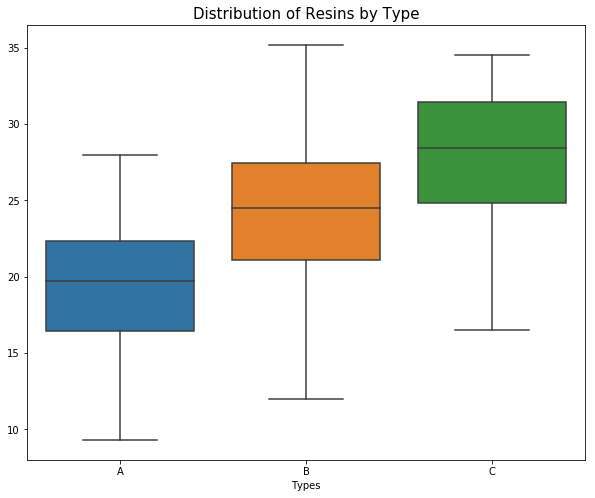

In [ ]:
#Plot boxplot of the different groupings of the resin
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=resin_data)

plt.title('Distribution of Resins by Type', size = 15) #set plot title
plt.xlabel('Types') #set xlabel title

The box plots above shows that the bonding strength for Type A resins are generally the lowest. The data is negatively skewed, and thus, Type As can generally be regarded as the type with a low bonding strength in comparison. 
All data for bonding strength of the three resin types are normally distributed  

Type B resins are not too different from Type C resins in bonding strength as the boxplot shows the distribution of the bonding strength of Type C resins to be within the range for Type B resins

Text(0.5, 1.0, 'Distribution of Bonding Strengths of Resins')

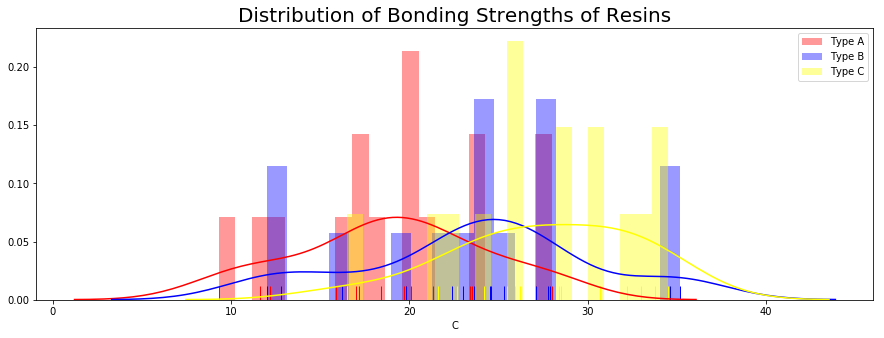

In [ ]:
#Compare distribution of Baseline,and TaiChi data after 24weeks
fig = plt.figure(figsize=(15, 5))#set figure size

#use distplot to view distributions
sns.distplot(resin_data['A'],  bins=20, color='red', rug=True, label='Type A') #baseline data
sns.distplot(resin_data['B'],  bins=20, color='blue',  rug=True, label='Type B') #control data
sns.distplot(resin_data['C'],  bins=20, color='yellow',  rug=True, label='Type C') #control data

plt.legend()#show legend

plt.title('Distribution of Bonding Strengths of Resins', size = 20) #set plot title

From the above;
Type A Resins generally have the lowest bonding strength, although, some are as good as some Type Bs and Cs
Type B and C resins are generally similar, but Type C resins have a generally more dependable high bonding strength than Type Bs.
Type B resins could be seen as the ones that can perform where Type As can, and where Type Cs can. We ould call them the General Purpose Resins
Type Bs have quite a number of resins performing even higher than the Type Cs. We could consider those rare.

##### Confirm assumptions using hypothesis.

### The hypothesis
$H_0$: $\mu_d = 0$ ,  All three resin types are similar.

$H_1$: $\mu_d \neq 0$, There is a difference amongst all three resin types.

In [ ]:
scs.f_oneway(resin_data['A'], resin_data['B'], resin_data['C'])# compute One-way ANOVA test to test hypothesis

F_onewayResult(statistic=8.488055984887513, pvalue=0.0008017448866768368)

We obtain a p value of 0.0008, which is less than the 0.05 significance level. 
A low p-value indicates support for the alternative hypothesis. 

We hence reject the null hypothesis. 

This means that there is significant difference in the bonding strengths of the three resin Types A,B,& C